In [3]:
!pip install opencv-python


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import warnings
from google.colab import drive
warnings.filterwarnings("ignore")

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/Deep Learning/archive.zip'
extract_path = '/content/drive/MyDrive/Deep Learning'  # Or any temp location

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List files to verify
print(os.listdir(extract_path))

['archive.zip', 'data']


In [7]:
with_mask_files = os.listdir('/content/drive/MyDrive/Deep Learning/data/with_mask')

In [8]:
without_mask_files = os.listdir('/content/drive/MyDrive/Deep Learning/data/without_mask')

In [9]:
print(with_mask_files[0:10])

['with_mask_345.jpg', 'with_mask_3452.jpg', 'with_mask_3453.jpg', 'with_mask_3454.jpg', 'with_mask_3456.jpg', 'with_mask_3457.jpg', 'with_mask_3455.jpg', 'with_mask_3458.jpg', 'with_mask_3459.jpg', 'with_mask_346.jpg']


In [10]:
print(without_mask_files[0:10])

['without_mask_3543.jpg', 'without_mask_3545.jpg', 'without_mask_3546.jpg', 'without_mask_3547.jpg', 'without_mask_3548.jpg', 'without_mask_3549.jpg', 'without_mask_3550.jpg', 'without_mask_355.jpg', 'without_mask_3551.jpg', 'without_mask_3552.jpg']


In [11]:
print("Number of with mask images: ",len(with_mask_files))
print("Number of without mask images: ",len(without_mask_files))
print("Total Number of Images: ", len(with_mask_files) + len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828
Total Number of Images:  7553


In [12]:
with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)

In [ ]:
without_mask_labels

In [14]:
labels = with_mask_labels + without_mask_labels

In [15]:
len(labels)

7553

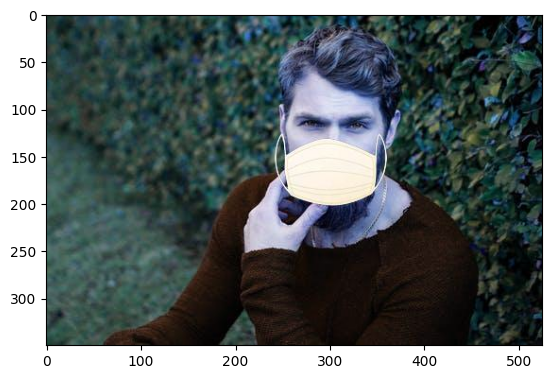

In [16]:
img = cv2.imread('/content/drive/MyDrive/Deep Learning/data/with_mask/with_mask_1.jpg')
plt.imshow(img)
plt.show()

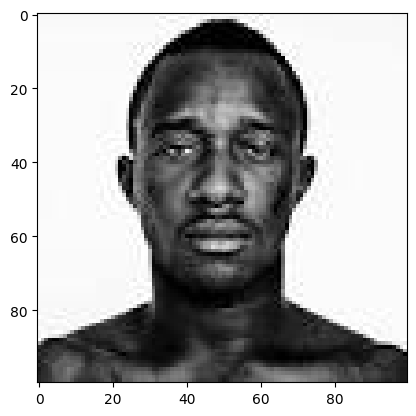

In [17]:
img = cv2.imread('/content/drive/MyDrive/Deep Learning/data/without_mask/without_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

# Convert image into numpy array + resize +RGB

In [18]:
with_mask_path = '/content/drive/MyDrive/Deep Learning/data/with_mask/'

data = []
for img_file in with_mask_files:
    image = cv2.imread(with_mask_path+img_file) # cv2.imread(with_mask_path+img_file)
    image = cv2.resize( image , (128,128) )/255.0 # cv2.resize(image, (128,128))
    data.append(image)

In [19]:
without_mask_path = '/content/drive/MyDrive/Deep Learning/data/without_mask/'

for img_file in without_mask_files:
    image = cv2.imread(without_mask_path+img_file) # cv2.imread(without_mask_path+img_file)
    image = cv2.resize( image , (128,128))/255.0 # cv2.resize(image, (128,128))
    data.append(image)


In [20]:
len(data)

7553

In [21]:
type(data)

list

In [22]:
data[0]

array([[[0.3372549 , 0.41176471, 0.51764706],
        [0.34509804, 0.41960784, 0.5254902 ],
        [0.34901961, 0.42352941, 0.52941176],
        ...,
        [0.94117647, 0.92941176, 0.94901961],
        [0.9372549 , 0.92156863, 0.94117647],
        [0.93333333, 0.91764706, 0.9372549 ]],

       [[0.34901961, 0.42745098, 0.52941176],
        [0.3372549 , 0.41176471, 0.51764706],
        [0.3372549 , 0.41568627, 0.52156863],
        ...,
        [0.94509804, 0.92941176, 0.94509804],
        [0.9372549 , 0.92156863, 0.94117647],
        [0.93333333, 0.91764706, 0.9372549 ]],

       [[0.35686275, 0.43921569, 0.54509804],
        [0.3372549 , 0.41960784, 0.5254902 ],
        [0.3372549 , 0.41960784, 0.52941176],
        ...,
        [0.94509804, 0.92941176, 0.94901961],
        [0.9372549 , 0.92156863, 0.94117647],
        [0.93333333, 0.91764706, 0.9372549 ]],

       ...,

       [[0.21960784, 0.26666667, 0.37647059],
        [0.29803922, 0.34509804, 0.4627451 ],
        [0.31764706, 0

In [23]:
data[0].shape

(128, 128, 3)

In [24]:
len(data) == len(labels)

True

In [25]:
X = np.array(data)
Y = np.array(labels)

In [26]:
print(Y)

[1 1 1 ... 0 0 0]


In [27]:
X_train_scale, X_test_scale, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [28]:
X_test_scale.shape

(1511, 128, 128, 3)

In [29]:
y_test.shape

(1511,)

In [30]:
X_train_scale.shape

(6042, 128, 128, 3)

In [31]:
X_train_scale[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 0.99607843],
        [1.        , 1.        , 0.99607843],
        [1.        , 1.        , 0.99607843]],

       ...,

       [[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.06666667, 0.06666667, 0.06666667],
        [0.06666667, 0

# reshaped -> (Number of image, width, height , channel)

In [4]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.7 MB/s eta 0:00:00


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [34]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid"))

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400,641 (28.23 MB)

 Trainable params: 7,400,641 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [37]:
history = model.fit(X_train_scale, y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 137s 794ms/step - accuracy: 0.6940 - loss: 0.6151 - val_accuracy: 0.8446 - val_loss: 0.3564
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 130s 761ms/step - accuracy: 0.8720 - loss: 0.3281 - val_accuracy: 0.8826 - val_loss: 0.2771
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 126s 739ms/step - accuracy: 0.8959 - loss: 0.2597 - val_accuracy: 0.8942 - val_loss: 0.2509
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 127s 748ms/step - accuracy: 0.9105 - loss: 0.2312 - val_accuracy: 0.9091 - val_loss: 0.2293
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 128s 752ms/step - accuracy: 0.9201 - loss: 0.1966 - val_accuracy: 0.9140 - val_loss: 0.2238


In [38]:
loss, accuracy = model.evaluate(X_test_scale, y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.9312 - loss: 0.1870


In [39]:
print("Loss is: ",loss)
print("Accuracy is: ",accuracy)

Loss is:  0.1800912618637085
Accuracy is:  0.9285241365432739


In [40]:
history.history

{'accuracy': [0.7862792015075684,
  0.8741953372955322,
  0.8924039006233215,
  0.9085893034934998,
  0.9181534051895142],
 'loss': [0.47157660126686096,
  0.3136938810348511,
  0.26399901509284973,
  0.22959649562835693,
  0.20666438341140747],
 'val_accuracy': [0.844628095626831,
  0.8826446533203125,
  0.8942148685455322,
  0.9090909361839294,
  0.9140495657920837],
 'val_loss': [0.3563845157623291,
  0.2770894169807434,
  0.25087103247642517,
  0.22927400469779968,
  0.22376388311386108]}

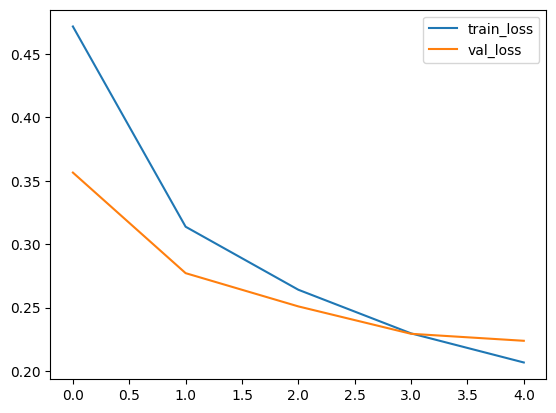

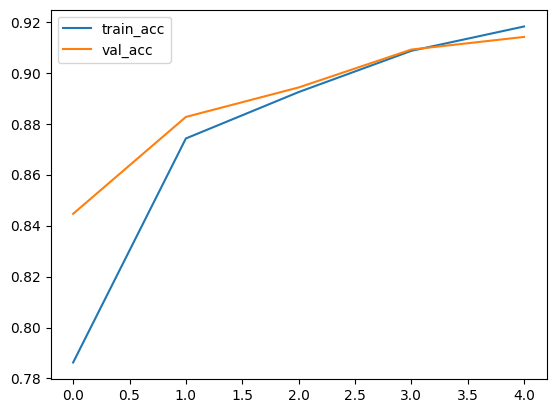

In [44]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label = 'train_acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()


In [45]:
model.save("model.h5")

In [ ]:
from tensorflow.keras.models import load_model

model_1 = load_model('/content/model.h5')

In [47]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400,643 (28.23 MB)

 Trainable params: 7,400,641 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [48]:
path_of_testing_image = '/content/drive/MyDrive/Deep Learning/data/without_mask/without_mask_1001.jpg'

prediction = model_1.predict( np.expand_dims(
                    cv2.resize( cv2.imread( path_of_testing_image ) ,(128,128) ) /255 ,
                    0 ))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [49]:
prediction[0]

array([0.00074937], dtype=float32)

In [50]:
prediction[0] > 0.5

array([False])